# Tarea 2 (Estadística descriptiva estatura)

## Pregunta 1
1. Para la misma subpoblación que delimito en la clase del viernes 31 de octubre de 2025, haga un
análisis pero ahora para talla (estatura).

- A) Establecer y delimitar el objetivo. (elegir una subpoblación)
- B) De ser necesario haga limpieza adicional de los datos.
- C) Hacer un descriptivo de LA TALLA, considerando las medidas de tendencia central, variabilidad y forma, incluyendo gráficas.
- D) En lo general ¿Qué aspectos sobresalen?
- E) Ahora haga el análisis anterior pero separando por sexo, y repita el inciso C.
- F) ¿Hay diferencias en las mediciones por sexo?

### Respuesta

In [1]:
# Librerias para análisis de datos
import pandas as pd
import matplotlib.pyplot as plt
from scipy.stats import skew, kurtosis

In [2]:
# Leemos el excel de la encuesta de ENSANUT
df = pd.read_excel('EnsanutMediciones.xls')

In [3]:
# Seleccionamos las columnas de interés
columnas = ['entidad', 'sexo', 'edad', 'peso', 'talla', 'cintura', 'sistol3', 'diastol3']
df = df[columnas]

# Convertimos las columnas a tipo numérico
for col in df.columns:
    df[col] = pd.to_numeric(df[col], errors='coerce')

In [4]:
# Imprimimos medidas de tendencia central y dispersión de la población
df.describe()

,entidad,sexo,edad,peso,talla,cintura,sistol3,diastol3
count,17224.000000,17224.000000,17224.000000,17133.000000,17133.000000,7477.000000,7861.000000,7861.000000
mean,16.956398,1.571122,25.492452,49.299375,138.836468,97.324034,125.383921,75.069202
std,8.182299,0.494930,21.715391,26.796850,27.487603,22.642630,47.731183,46.971293
min,1.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,11.000000,1.000000,8.000000,24.950000,123.600000,86.200000,109.000000,65.000000
50%,15.000000,2.000000,17.000000,51.900000,147.600000,94.500000,120.000000,72.000000
75%,24.000000,2.000000,41.000000,67.200000,157.300000,103.200000,134.000000,80.000000
max,32.000000,2.000000,104.000000,222.220000,222.200000,222.200000,999.000000,999.000000


Para estas medidas podemos observar que los valores de desviación estandar son muy altos para valores como edad, peso, talla, cintura, sistol3 y diastol3 (valores de tensión arterial), ya que rondan entre 21 y 47, indicando que nuestra poblacion tiene informacion muy dispersa.

Para este ejercicio nos enfocaremos solamente en mediciones de talla y peso para ver una correlacion y hacer un analisis descriptivo unicamente de la talla, por lo que si generamos un grafico de puntos con estos mismos se puede apreciar lo siguiente.

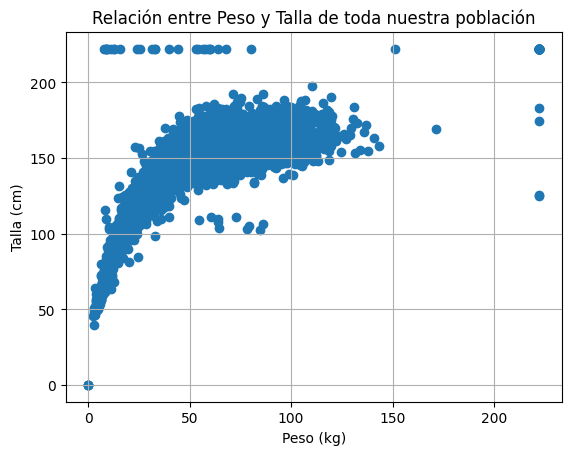

In [5]:
# Graficamos la relación entre peso y talla de toda la población
plt.scatter(df['peso'], df['talla'])
plt.xlabel('Peso (kg)')
plt.ylabel('Talla (cm)')
plt.title('Relación entre Peso y Talla de toda nuestra población')
plt.grid(True)
plt.show()

Vemos que los datos tienen forma no lineal, es una curva en la cual al inicio vemos un incremento bastante alto en la talla según el peso, pero a medida que el peso aumenta, la talla comienza a dismunuir mas lentamente entre los 125 y 150 centimetros.

Además de esto podemos ver que hay mucha precencia de outliers o valores atipicos, principalmente siendo valores de 0 o 222.2, los cuales son valores que segun la encuesta no se les realizó una medicion a la persona, por lo que harbrá que tenerlo en cuenta durante la limpieza.

### A) Establecer y delimitar el objetivo. (elegir una subpoblación)
Para este caso se uilizara el de la clase del 31/10, Adultos de entre 30 y 45 años

In [6]:
# Objetivo: adultos entre 30 y 45 años    
df = df[df['edad'].between(30, 45)]

### B) Limpieza adicional de los datos.
Como se mencionó anteriormente, los datos requieren tratamiento con los valores 0 y 222.2

In [7]:
# Eliminar registros donde no se tomó la medicion de talla (valores con 222.2 según lo que dice el catálogo de la encuesta)
df = df[(df['talla'] != 222.2) & (df['peso'] != 222.2)]
df = df[(df['peso'] > 0) & (df['talla'] > 0)]

### C) Hacer un descriptivo de LA TALLA, considerando las medidas de tendencia central, variabilidad y forma, incluyendo gráficas.

Si volvemos a imprimir la estadistica descriptiva basica de nuestra subpoblación, veremos lo siguiente:

In [8]:
# Imprimimos medidas de tendencia central y dispersión de nuestra subpoblación
df['talla'].describe()

count    3104.000000
mean      155.106604
std         8.920294
min       102.400000
25%       148.675000
50%       154.400000
75%       160.700000
max       190.200000
Name: talla, dtype: float64

Podemos ver como los datos ya se encuentran un poco mas agrupados. Si nos enfocamos en la talla, podemos ver que la media de la subpoblación de adultos entre 30 y 45 años tienen una estatura de 155.10 cm, con una desviación estandar de 8.9, mientras que la media se ve bastante similar al promedio siendo de 154.4 cm. Por el lado de los Q1 y Q3 podemos ver respectivamente valores de 148 y 160, valores bastante cercanos a la media, pero en el caso de los minimos y maximos podemos ver la presencia de un par de outliers, ya que el minimo registrado es de apenas 102 cm, y el mas alto tiene 190 cm.

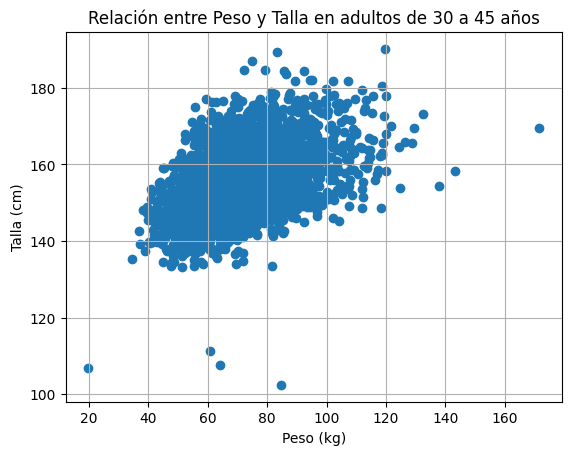

In [9]:
plt.scatter(df['peso'], df['talla'])
plt.xlabel('Peso (kg)')
plt.ylabel('Talla (cm)')
plt.title('Relación entre Peso y Talla en adultos de 30 a 45 años')
plt.grid(True)
plt.show()

Al imprimir la relacion de peso y talla podemos ver lo que se comentaba anteriormente de los outliers en esta subpoblación, pero para la gran mayoria de los datos podemos ver que se concentran en su mayoria en una gran mancha que va muy apegada a lo que veiamos en los cuantiles.

/tmp/ipykernel_13614/1710345987.py:5: UserWarning: No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
  plt.legend()


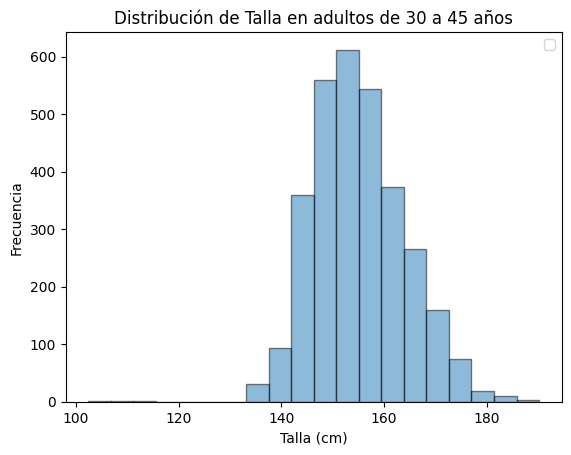

In [10]:
plt.hist(df['talla'], bins=20, edgecolor='black', alpha=0.5)
plt.xlabel('Talla (cm)')
plt.ylabel('Frecuencia')
plt.title('Distribución de Talla en adultos de 30 a 45 años')
plt.legend()
plt.show()

Si vemos los datos en un histograma, se puede apreciar que tenemos una forma de distribucion normal con una ligera asimetria positiva, pero algo que resalta bastante es el hecho de que la mayor presencia de valores atipicos esta en los valores de entre 100 y 120.

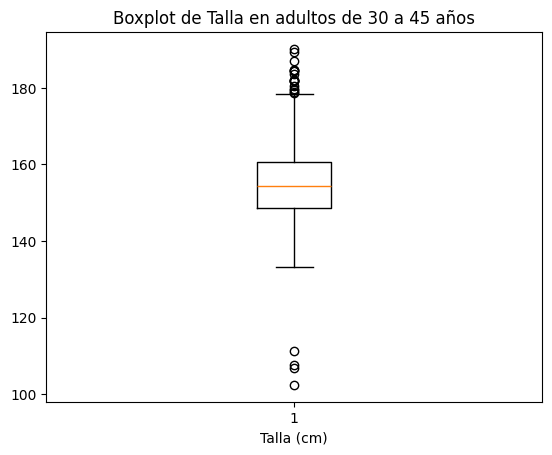

In [11]:
plt.boxplot(df['talla'])
plt.xlabel('Talla (cm)')
plt.title('Boxplot de Talla en adultos de 30 a 45 años')
plt.show()

Lo curioso comienza con esta grafica de boxplot, ya que nor muestra que son mas los valores atipicos por encima del Q3, pero los que se encuentran por debajo del Q1 estan mucho mas alejados.

### D) En lo general ¿Qué aspectos sobresalen?

En resumen, los datos seleccionados para nuestra subpoblación de adultos entre 30 y 45 años tienen una forma de distribucion normal, la media y mediana no estan tan alejadas entre si, siendo de aproximadamente 155 cm de estatura en las personas análizadas. Lo que mas puede llamar la atencion de manera negativa serian los valores atipicos, ya que pese a que exista una mayor cantidad de outliers por enciama de Q3, los valores que tenemos por debajo de Q1 están mucho mas alejados de nuestra distribución y quiza por esto es que nuestra desviacion estandar esta algo elevada con valor de 8.9.

Si limpiamos estos outliers que se encuentran en valores por debajo de 120 cm y por encima de 180, podemos ver lo siguiente:

In [12]:
df = df[(df['talla'] >= 120) & (df['talla'] <= 180)]
df['talla'].describe()

count    3086.000000
mean      155.037103
std         8.552664
min       133.300000
25%       148.625000
50%       154.300000
75%       160.500000
max       179.700000
Name: talla, dtype: float64

/tmp/ipykernel_13614/273269460.py:5: UserWarning: No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
  plt.legend()


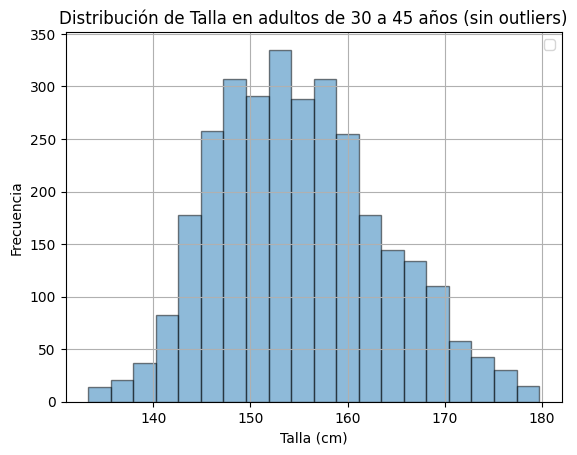

In [13]:
df.hist('talla', bins=20, edgecolor='black', alpha=0.5)
plt.xlabel('Talla (cm)')
plt.ylabel('Frecuencia')
plt.title('Distribución de Talla en adultos de 30 a 45 años (sin outliers)')
plt.legend()
plt.show()

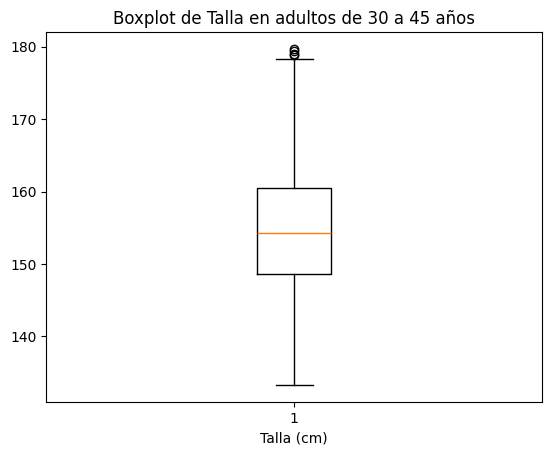

In [14]:
plt.boxplot(df['talla'])
plt.xlabel('Talla (cm)')
plt.title('Boxplot de Talla en adultos de 30 a 45 años')
plt.show() 

Al final vemos que nuestra desviacion estandar no disminuyó tanto, quedando en 8.5. El mayor cambio en nuestros datos se encuentra en las graficas, ya que se puede apreciar mejor la distribucion normal con asimetria positiva como lo comentabamos en un inicio.

### E) Ahora haga el análisis anterior pero separando por sexo, y repita el inciso C.

In [15]:
# Generamos dos dataframes separados por sexo (1 - hombres, 2 - mujeres)
df_h = df[df['sexo'] == 1]
df_m = df[df['sexo'] == 2]

In [16]:
print('Estadistica descriptiva de Hombres')
print(df_h['talla'].describe())

print('\nEstadistica descriptiva de Mujeres')
print(df_m['talla'].describe())

Estadistica descriptiva de Hombres
count    947.000000
mean     163.203168
std        6.953131
min      134.500000
25%      158.000000
50%      163.200000
75%      168.150000
max      179.700000
Name: talla, dtype: float64

Estadistica descriptiva de Mujeres
count    2139.000000
mean      151.421739
std         6.445335
min       133.300000
25%       146.900000
50%       151.100000
75%       155.700000
max       176.400000
Name: talla, dtype: float64


Al separar entre hombres y mujeres es donde comenzamos a ver mas diferencias, ya que por lo general los hombres suelen ser +10 cm mas altos que las mujeres.

En el caso de media y mediana de los hombres tenemos 163 cm, mientras que en las mujeres 151 (los valores se mantienen igual para ambas medidas).

La desviacion estandar de los datos para ambos grupos es similar, siendo 6.4 en mujeres y 6.9 en hombres, por lo que los datos se encuentran menos dispersos que en el caso de toda la subpoblación, lo cual hace sentido al ver las claras diferencias de estatura que tienen hombres y mujeres, algo que se ve bastante por temas biologicos.

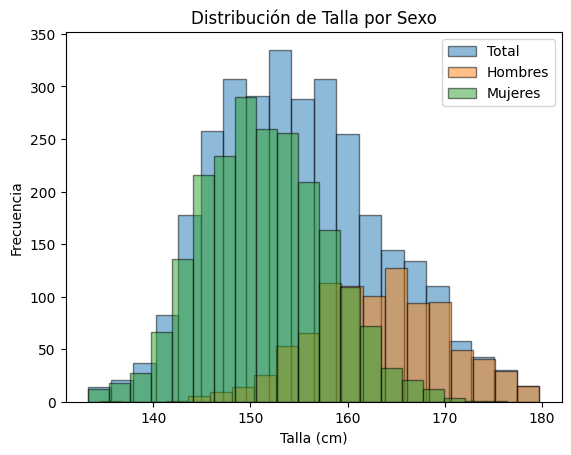

In [17]:

plt.hist(df['talla'], bins=20, edgecolor='black', alpha=0.5, label='Total')
plt.hist(df_h['talla'], bins=20, edgecolor='black', alpha=0.5, label='Hombres')
plt.hist(df_m['talla'], bins=20, edgecolor='black', alpha=0.5, label='Mujeres')
plt.xlabel('Talla (cm)')
plt.ylabel('Frecuencia')
plt.title('Distribución de Talla por Sexo')
plt.legend()
plt.show()

Y si generamos un histograma de nuestros 3 conjuntos de datos, observamos en en el caso de las mujeres (gráfica verde) se tiene un major numero de mediciones y con una distribucion normal ligeramente asimetrica positiva (y probablemente es por este subgrupo que vemos esa asimetria en la subpoblacion total), para el caso de los hombres (gráfica naranja) vemos que las mediciones son menos, pero si mantienen una distribución normal mas simetrica.

/tmp/ipykernel_13614/3420108583.py:1: MatplotlibDeprecationWarning: The 'labels' parameter of boxplot() has been renamed 'tick_labels' since Matplotlib 3.9; support for the old name will be dropped in 3.11.
  plt.boxplot(df['talla'], positions=[1], widths=0.6, labels=['Total'])
/tmp/ipykernel_13614/3420108583.py:5: MatplotlibDeprecationWarning: The 'labels' parameter of boxplot() has been renamed 'tick_labels' since Matplotlib 3.9; support for the old name will be dropped in 3.11.
  plt.boxplot(df_h['talla'], positions=[2], widths=0.6, labels=['Hombres'])
/tmp/ipykernel_13614/3420108583.py:9: MatplotlibDeprecationWarning: The 'labels' parameter of boxplot() has been renamed 'tick_labels' since Matplotlib 3.9; support for the old name will be dropped in 3.11.
  plt.boxplot(df_m['talla'], positions=[3], widths=0.6, labels=['Mujeres'])


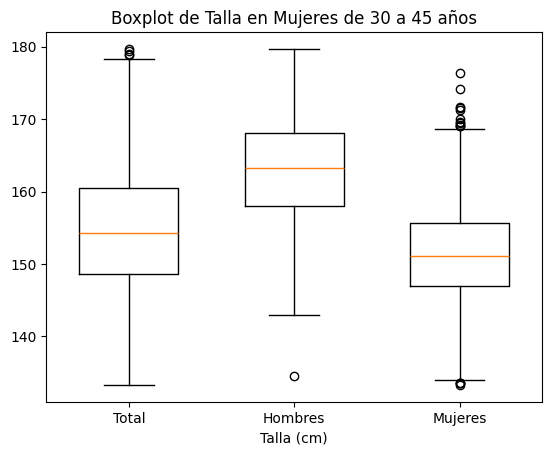

In [18]:
plt.boxplot(df['talla'], positions=[1], widths=0.6, labels=['Total'])
plt.xlabel('Talla (cm)')
plt.title('Boxplot de Talla en adultos de 30 a 45 años')

plt.boxplot(df_h['talla'], positions=[2], widths=0.6, labels=['Hombres'])
plt.xlabel('Talla (cm)')
plt.title('Boxplot de Talla en Hombres de 30 a 45 años')

plt.boxplot(df_m['talla'], positions=[3], widths=0.6, labels=['Mujeres'])
plt.xlabel('Talla (cm)')
plt.title('Boxplot de Talla en Mujeres de 30 a 45 años')

plt.show()

Y para el caso de las gráficas de boxplot, tenemos que las mujeres son las que tienen un mayor numero de valores atipicos por encima del Q3. Para el caso de los hombres hay muy poca presencia de valores atipicos, tieniendo una mejor distribución.

---

## Pregunta 2
2. En una empresa se llevan los registros del número de fallas de un proceso por mes; la media es de 10 y la mediana de 5:
- A) Si usted tiene que reportar la tendencia central de fallas, ¿qué número reportaría?
- B) A qué puede deberse la discrepancia entre la media y la mediana? Explique y argumente el porqué.

### Respuesta

A) Reportaría la media (10 fallas) como medida de tendencia central, ya que en una distribución normal la media es donde está concentrada la mayor cantidad de valores.

B) La discrepancia entre la media (10) y la mediana (5) se debe a que el promedio está sesgado por outliers o valores atípicos muy altos que alteran el valor de nuestro promedio. Cuando hay valores excepcionalmente altos en algunos meses (outliers), estos elevan la media pero no afectan tanto la mediana, creando esta diferencia entre ambas medidas de tendencia central.

---

## Pregunta 3

3. Una empresa se envasan bebidas cuyo contenido ideal es de 600 mililitros. La PROFECO ha aplicado multas
a la empresa porque el contenido neto es muy diferente de los 600 ml. Para esto la norma oficial NOM-002-
SCFI (2012) establece que la discrepancia máxima tolerada para estos casos es de ±15 ml. Para mejorar los
controles dentro de la empresa se hacen evaluaciones de los lotes de producción, y para cada dos mil piezas
se evalúa el contenido de una muestra de 40 artículos. Para un lote A se obtiene que el promedio de la
muestra es de 600.1 y la desviación estándar 10; mientras que para el lote B el promedio de la muestra es
de 596 y la desviación estándar 3, ¿Qué lote cumple mejor las especificaciones? Argumente.

### Respuesta

Segun la norma indicada, las bebidas deberian de tener entre 585 y 615 ml por envase. Por lo que si analisamos ambos lotes tenemos lo siguiente.

**Para lote A:**
- Media: 600.1
- Std: 10

Aplicando 3S (3*std):
- 600.1 ± 30
- Valores entre 570.1 y 630.1
- No cumple con la norma

**Para lote B:**
- Media: 596
- Std: 3

Aplicando 3S (3*std):
- 596 ± 9
- Valores entre 587 y 605
- Si cumple con la norma


El **Lote B** cumple especificaciones, esto debido a que sus limites si estan dentro de lo marcado. En un inicio podria parecer que solamente por la media, el lote A si compliría, pero al tener una desviacion tan grande, tenemos valores muy alejados entre si y esto genera que haya envases que no cumplan con las especificaciones. Por otro lado, el lote B, aunque su media esta por debajo, su std es baja, lo cual hace que sus valores en la distribucion esten mas cerca, y como resultado tenemos que si esta dentro de lo que marca la norma.

A continucacion se muestra un diagrama con lo antes mencionado.


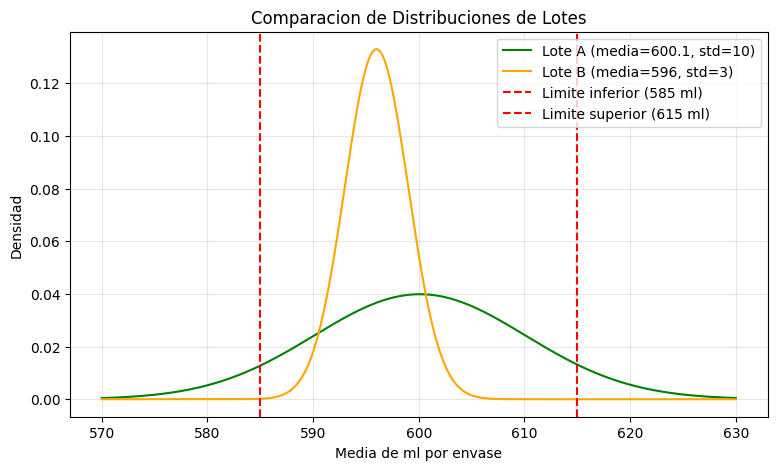

In [19]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.stats import norm

x = np.linspace(570, 630, 1000)

plt.figure(figsize=(9, 5))

lote_a = norm.pdf(x, 600.1, 10)
plt.plot(x, lote_a, label=f'Lote A (media=600.1, std=10)', color='green')

lote_b = norm.pdf(x, 596, 3)
plt.plot(x, lote_b, label=f'Lote B (media=596, std=3)', color='orange')

plt.title("Comparacion de Distribuciones de Lotes")
plt.xlabel("Media de ml por envase")
plt.ylabel("Densidad")
plt.grid(alpha=0.3)
plt.axvline(x=585, color='red', linestyle='--', label='Limite inferior (585 ml)')
plt.axvline(x=615, color='red', linestyle='--', label='Limite superior (615 ml)')
plt.legend()

plt.show()


Podemos observar como es que los valores del lote B si se encuentran dentro de las barras rojas que delimitan lo que marca la NOM-002-SCFI, mientras que en el lote A se ve como las colas estan por fuera de lo indicado.

---

## Pregunta 4

4. Cuando se saca una muestra de una población se hacen las siguientes afirmaciones, explique



| Afirmación                                  | Significado |
|---------------------------------------------|-------------|
| Los resultados de una muestra son variables | Significa que si tomamos diferentes muestras de una misma poblacion y para cada una de estas calculamos sus medidas de tendencia central, los resultados no siempre seran los mismos y existe una variabilidad en funcion a como es que se haya hecho el ejercicio de muestreo. |
| Siempre hay variación debido al muestreo    | Por mas que el ejercicio de muestreo se haya hecho de manera correcta (aleatorio, con tamaño adecuado, sin sesgos, etc...) aun asi los resultados de las medidas de tendencia central pueden variar ligeramente entre si. |